# Semantic Segmentation


## Class Heatmap
![Heatmap](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRd6rCHDMj1Yf8lrDD5in14daoDyegD-EfCI6fwU7dSD9VB9OW)

## Different CV Tasks
![CVTasks](https://miro.medium.com/max/2000/1*cHtBw8yBhprNXj-CBQBx5g.png)

## Traditional way (CRF)

With the convention of __super pixel__ it is clear that we can represent a segmented image in a much lower dimensional representation.
![super_pixel](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS13gXULV9qrPK7hcC8Lz-UONCl81z28vL1Y_AvD2ImDSifcDTcIA)

If we have this super, we can plug a softmax on top of the pixles inside the super pixel to get its class label.

__But how to define a super pixel?__

With convolution filters spanning the image, they can be a form of a super pixel.

But this would be a shallow model. No spatial hierarchy.

A better idea is to use a deep conv model, and use the final feature map (say 7x7 or 4x4) that divide the input into large grids, which are very good super pixels.

Having done this downsampling, we are left with 2 more operations:

1- Upsampling again to the original image size:
done with deconv or bilinear upsampling 

2- Class heatmaps:
done with 1x1 conv with output feature maps = n_classes

We will see that in detail next:

## Fully Convolutional NN

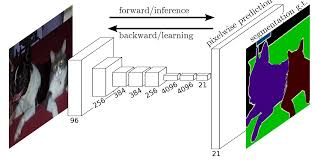

## Deconvolution, Transposed Conv and Upsampling




https://distill.pub/2016/deconv-checkerboard/

When we have neural networks generate images, we often have them build them up from low resolution, high-level descriptions. This allows the network to describe the rough image and then fill in the details.

In order to do this, we need some way to go from a lower resolution image to a higher one. We generally do this with the deconvolution operation. Roughly, deconvolution layers allow the model to use every point in the small image to “paint” a square in the larger one.

(Deconvolution has a number of interpretations and different names, including “transposed convolution.”


http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html
https://github.com/vdumoulin/conv_arithmetic

__How to get larger feature maps out of small ones?__
Let’s now consider what would be required to go the other way around, i.e., map from a 4-dimensional space to a 16-dimensional space. This operation is known as a transposed convolution.
Sometimes, it is referred to as "fractionally strided convolutions", becasue if you imagine you have stride S=1/2, then you enlarge the size by 2.

The simplest way is to apply a kernel that is larger in size than the input, and use __normal__ conv:

Convolving kernel N=3 with input M=2 gives N+M-1=4 --> 4x4 output

![Deconv](http://deeplearning.net/software/theano/_images/no_padding_no_strides.gif)

But what if we have a large input, like 100x100, and we want to have bigger output.
In this case we can pad the input:


![Deconv_pad](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides_transposed.gif)

__Fraction strides__
transpose of a convolution with s > 1 involves an equivalent convolution with s < 1. As will be explained, this is a valid intuition, which is why transposed convolutions are sometimes called fractionally strided convolutions.

![Strided_deconv](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides_transposed.gif)


## Dialated Conv

Those familiar with the deep learning literature may have noticed the term “dilated convolutions” (or “atrous convolutions”, from the French expression convolutions à trous) appear in recent papers. Here we attempt to provide an intuitive understanding of dilated convolutions. For a more in-depth description and to understand in what contexts they are applied, see Chen et al. (2014) [2]; Yu and Koltun (2015) [3].

Dilated convolutions “inflate” the kernel by inserting spaces between the kernel elements. The dilation “rate” is controlled by an additional hyperparameter d. Implementations may vary, but there are usually d - 1 spaces inserted between kernel elements such that d = 1 corresponds to a regular convolution.

![Dilated](http://deeplearning.net/software/theano/_images/dilation.gif)

Dialated conv is good with sparse inputs, where we don't need to multiply the kernel with evey input, but we want a bigger receptive field, keeping the same number of kernel params.

## Upsampling:
https://distill.pub/2016/deconv-checkerboard/

__What if (N-M+1)/S is a fraction?__
Unfortunately, deconvolution can easily have “uneven overlap,” putting more of the metaphorical paint in some places than others [7]. In particular, deconvolution has uneven overlap when the kernel size (the output window size) is not divisible by the stride (the spacing between points on the top). While the network could, in principle, carefully learn weights to avoid this  — as we’ll discuss in more detail later — in practice neural networks struggle to avoid it completely.

To avoid these artifacts, we’d like an alternative to regular deconvolution (“transposed convolution”). Unlike deconvolution, this approach to upsampling shouldn’t have artifacts as its default behavior. Ideally, it would go further, and be biased against such artifacts. Upsample is simply the opposite of max pool. It can spread based on NN pixels, or using bilinear transforms.

__Upsample + Conv__
Another approach is to separate out upsampling to a higher resolution from convolution to compute features. For example, you might resize the image (using nearest-neighbor interpolation or bilinear interpolation) and then do a convolutional layer. This seems like a natural approach, and roughly similar methods have worked well in image super-resolution 



## Encoder Decoder Architecture
![EncDec](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/583e2dab221ad5d54c1b1cc0a9df4f1254bf3942/3-Figure1-1.png)


___Downsampling___

__Stride 2 conv:
Using stride 2 means the width and height of the feature map are downsampled by a factor of 2 (in addition to any changes induced by border effects).
So in SAME conv (the most widely used type, we halve the size by stride 2 conv__

According to the equations (valid: (N-M+1)/S, normal: (N-M+2P)/S + 1) stride 2 conv gives roughtly half the size:

![strid_2](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides.gif)


_Strided convolutions are rarely used in practice_, although they can come in handy for some types of models; it’s good to be familiar with the concept.

To downsample feature maps, instead of strides, we tend to use the __max-pooling__ operation, which you saw in action in the first convnet example. Let’s look at it in more depth.

According to the equations (valid: (N-M+1)/S, normal: (N-M+2P)/S + 1) stride 2 conv gives roughtly half the size:

![strid_2](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides.gif)

# The max-pooling operation

_Downsampleing_: In the convnet example, you may have noticed that the size of the feature maps is halved after every MaxPooling2D layer. 

For instance, before the first MaxPooling2D layers, the feature map is 26 × 26, but the max-pooling operation halves it to 13 × 13.

_That’s the role of max pooling: to aggressively downsample feature maps, much like strided convolutions._

Max pooling consists of extracting windows from the input feature maps and outputting the max value of each channel.

_It’s conceptually similar to convolution, except that instead of transforming local patches via a learned linear transformation (the convolution kernel), they’re transformed via a hardcoded max tensor operation._

_A big difference from convolution is that max pooling is usually done with 2 × 2 windows and stride 2, in order to downsample the feature maps by a factor of 2. On the other hand, convolution is typically done with 3 × 3 windows and no stride (stride 1)._

__Average Pooling__

https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9

Note that: the blog has issue in plotting, we need to add .astype(uint8)



Max pooling selects the brighter pixels from the image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image. For example: in MNIST dataset, the digits are represented in white color and the background is black. So, max pooling is used. Similarly, min pooling is used in the other way round. 

Whereas average pooling extracts features like edges so smoothly.



# CAMVID
[CAMVID](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/) is dataset by Cambridge 
_"The Cambridge-driving Labeled Video Database (CamVid) is the first collection of videos with object class semantic labels, complete with metadata. The database provides ground truth labels that associate each pixel with one of 32 semantic classes."_

It has 701 RGB images (960x720), and their corresponding ground truth masks.
It has 32 classes, where each pixel is labeled according to 1 of 32 colors. This is called per-pixel semantic segmentation (vs. instance segmentation as described above).

The colors mapping can be found in a separate [file](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/data/label_colorsSorted.txt).

The ground truth are represented as colored images, where each pixel color corresponds to a class according to the mapping in the file.

To generate the masks for training, you need to perform this mapping yourself. Once done, you can save them as npy files.


To get all the files, you can get the labels (masks images) from this [link](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/data/LabeledApproved_full.zip)

However, to get the corresponding images, you need to run a script to extract the frames from few video sequences (like CamSeq01)

Under this nice [repo](https://github.com/GeorgeSeif/Semantic-Segmentation-Suite), the author has already done that for us, and split the data into train/val/test already. We're going to use that.

In [0]:
view = 0
batch_sz = 4
epochs = 1
steps_per_epoch = 1000
validation_steps = 100

In [11]:
!git clone https://github.com/GeorgeSeif/Semantic-Segmentation-Suite.git
  

fatal: destination path 'Semantic-Segmentation-Suite' already exists and is not an empty directory.


In [0]:
import os

In [0]:
from pathlib import Path
data_path = Path('Semantic-Segmentation-Suite/CamVid')

In [14]:
print('Number of train frames: ' + str(len(os.listdir(data_path/'train'))))
print('Number of train labels: ' + str(len(os.listdir(data_path/'train_labels'))))
print('Number of val frames: ' + str(len(os.listdir(data_path/'val'))))
print('Number of val labels: ' + str(len(os.listdir(data_path/'val_labels'))))
print('Number of test frames: ' + str(len(os.listdir(data_path/'test'))))
print('Number of test labels: ' + str(len(os.listdir(data_path/'test_labels'))))
print('Total frames: ' + str(len(os.listdir(data_path/'train')) + len(os.listdir(data_path/'val')) + len(os.listdir(data_path/'test'))))

Number of train frames: 421
Number of train labels: 421
Number of val frames: 112
Number of val labels: 112
Number of test frames: 168
Number of test labels: 168
Total frames: 701


Now, let's see which classes we have. This can be found in the original CAMVID [text file](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/data/label_colors.txt). However, under the same repo, the author has dumped it into csv which we will use.

In [0]:
import pandas as pd
classes = pd.read_csv(data_path / 'class_dict.csv', index_col =0)

In [16]:
classes

,r,g,b
name,,,
Animal,64,128,64
Archway,192,0,128
Bicyclist,0,128,192
Bridge,0,128,64
Building,128,0,0
Car,64,0,128
CartLuggagePram,64,0,192
Child,192,128,64
Column_Pole,192,192,128


In [17]:
n_classes = len(classes)
n_classes

32

This data frame maps the class names to colors.

To access the colors, we can index the dataframe with its row index name using the .loc operation.


Now we are ready to create a map from class name to color

In [0]:
cls2rgb = {cl:list(classes.loc[cl, :]) for cl in classes.index}

## Now let's visualize and explore some samples:

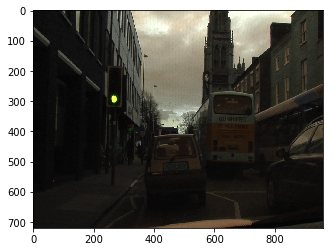

In [19]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
#from google.colab.patches import  cv2_imshow

#img = cv2.imread(data_path/'train/0001TP_006690.png')
img = cv2.imread(str(data_path) + '/train/0001TP_006690.png')
plt.imshow(img)


Let's have a look on the masks (the ground truth)

As you can see the masks are just colors (L,W,3).
What we actually want is a (L,W) matrix, with each value is from 0 to 31 representing the 32 class labels.

Colors are different from the colors in cls2rgb! Because the order is BGR not RGB when using cv2.imread: https://stackoverflow.com/questions/46898979/how-to-check-the-channel-order-of-an-image

If you want to get the same order as in the color mapping of CAMVID, use the cv converted

In [0]:
import numpy as np
mask = cv2.imread(str(data_path) + '/train_labels/0001TP_006690_L.png')
mask = cv2.cvtColor((mask).astype(np.uint8), cv2.COLOR_BGR2RGB)# If you want to get the same order as in the color mapping of CAMVID, use the cv converted

Now if you plot the mask again, you will see different colors. For example the red and blue are reversed than before:

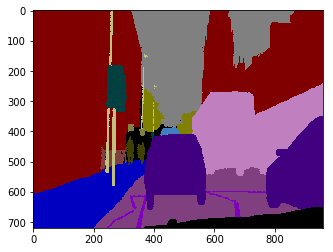

In [21]:
plt.imshow(mask)

Another solution is to use load_image from keras which uses RGB (it uses PIL under the hood) unlike cv2.imread

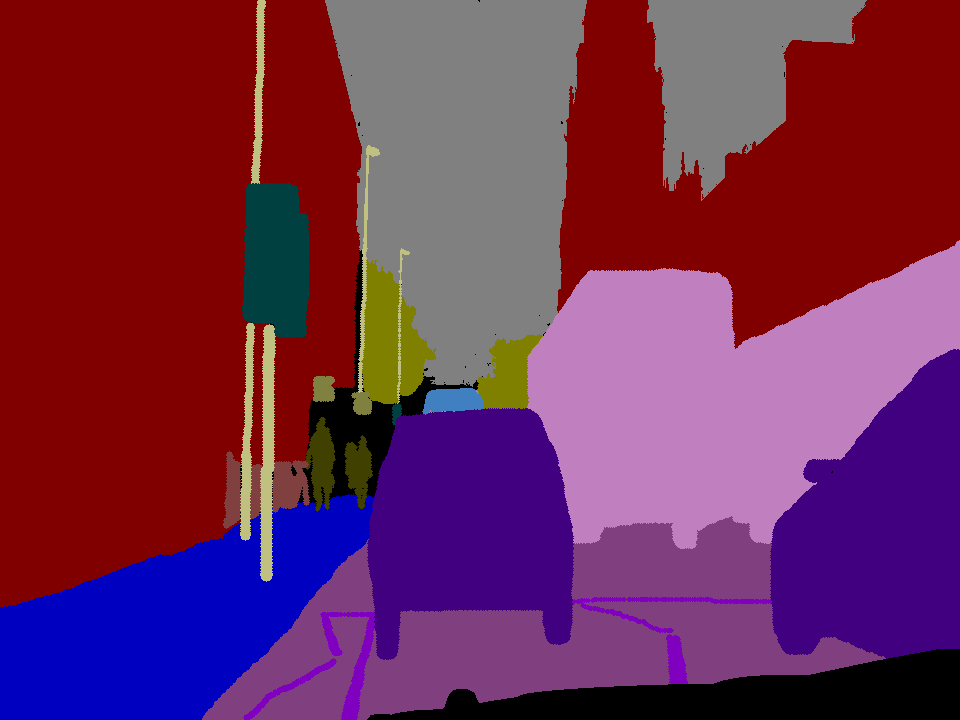

In [91]:
from keras.preprocessing.image import load_img
mask = load_img(str(data_path) + '/train_labels/0001TP_006690_L.png')
mask

In [0]:
mask = np.array(mask)# Now colors are the same as in the dict, since keras load_img uses RGB order.

In [24]:
mask.shape

(720, 960, 3)

# Masks labels adjustment
Now to perform the mapping, we want to apply a mapping using on every pixel.
We can create a dict from color to indx (rgb2idx) and apply it on all pixels.
It can be done using the apply_along_axis operation, but takes very long. 

The NN model classification output is usually produced from a softmax. The softmax produces a probability score over n_classes output. If we perform max over this output, we have a vector of size n_classesx1.

As described earlier we have LxW outputs, one per pixel, each representing a class, which we called a class heatmap. In NN world, this output is produced from LxW softmax operations over each pixel, so we have LxWxn_classes scores.

The ground truth for this output must also have LxWxn_classes, where the encoding of class label is done via One-Hot-Encoding (OHE).

In theory, the LxW mask is enough to train a NN model, since we can use sparse_categorical_cross_entropy. But we will not use this option for reasons that will be described later.



So we will try now to produce the LxWxn_classes mask:
__Numpy vector operations__
Below is a much faster implementation.

It loops over every class color, and looks for it in the mask. If found, it sets its value at the corresponding pixel, else, the pixel mask value stays all zeros. The logical operations over the whole image is much faster, while looping is kept only on the few classes.


In [0]:
def adjust_mask(mask, flat=False, ohe=False):
    
    semantic_map = []
    for colour in list(cls2rgb.values()):        
        equality = np.equal(mask, colour)# 256x256x3 with True or False
        class_map = np.all(equality, axis = -1)# 256x256 If all True, then True, else False
        semantic_map.append(class_map)# List of 256x256 arrays, map of True for a given found color at the pixel, and False otherwise.
    semantic_map = np.stack(semantic_map, axis=-1)# 256x256x32 True only at the found color, and all False otherwise.
    if flat:
      semantic_map = np.reshape(semantic_map, (-1,256*256))
    semantic_map = np.float32(semantic_map)# convert to numbers
    if not ohe:
      semantic_map = np.argmax(semantic_map, axis=-1)

    return semantic_map

In [0]:
new_mask = adjust_mask(mask, ohe=False)

In [27]:
new_mask.shape

(720, 960)

To make sure we performed the mapping correctly, let's try to do the reverse mapping.
Note that, we will need this later when we get predictions from our network and we want to view it as RGB mask like the original data labels.

First, we want to create the reverse mapping from class index to RGB color. Again we use dict comprehensions:

In [0]:
idx2rgb={idx:np.array(rgb) for idx, (cl, rgb) in enumerate(cls2rgb.items())}


This time we have a (L,W,32) mask and we want to map it to color mask (L,W,3). First we need to map it to index map using np.argmax, then use idx2rgb to restore the color back

In [0]:
# Map the idx back to rgb
def map_class_to_rgb(p):
  
  return idx2rgb[p[0]]

#rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(np.argmax(new_mask, axis=-1), -1))
rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(new_mask, -1))

In [30]:
rgb_mask.shape

(720, 960, 3)

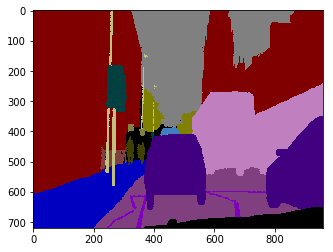

In [31]:
plt.imshow(rgb_mask)

# Data in RAM
One option is to perform the above operation over all the data files masks, and load them all in RAM.

You must sort the files, otherwise you get wrong GT to mask mapping

You don't need to get the same file name, in the 2 folders, as we can sort by name. The only difference in img and mask name is _L.png


In [0]:
def load_CAMVID(data_type='train', enc='ohe', shape='normal'):
  img_path = str(data_path) + '/' + data_type + '/'
  labels_path = str(data_path) + '/' + data_type + '_labels/'
  # without adding target_size=(256,256) in load_img we get Out of mem: 421x960x720x32x4bytes is around 34GB!
  #x = np.array([np.array(np.float32(load_img(str(img_path) + file, target_size=(256,256))))*1./255 for file in sorted(os.listdir(img_path))])
  x = np.array([np.array(load_img(str(img_path) + file, target_size=(256,256)))*1./255 for file in sorted(os.listdir(img_path))])
  if(enc=='ohe'):
    
    y = np.array([adjust_mask(np.array(load_img(str(labels_path) + file, target_size=(256,256)))) for file in sorted(os.listdir(labels_path))])
  elif(enc=='sparse_cat'):
    y = np.array([adjust_mask(np.array(load_img(str(labels_path) + file, target_size=(256,256)))) for file in sorted(os.listdir(labels_path))])
  if(shape == 'flat'):
    y = np.reshape(y.shape[0], y.shape[1]*y.shape[2])
    y = np.expand_dims(y, axis=-1)
  return x, y
  

In [33]:
import time
start = time.time()
x_train, y_train = load_CAMVID(data_type='train')
#x_test, y_test = load_CAMVID(data_type='test')# Don't load test for RAM consumption
x_val, y_val = load_CAMVID(data_type='val')
end = time.time()
print('Time elapsed: ', end-start)

Time elapsed:  51.07230806350708


In [34]:
print(x_train.shape)
print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(421, 256, 256, 3)
(421, 256, 256)
(112, 256, 256, 3)
(112, 256, 256)


# Pytorch data preparation
Now we have the data in RAM as numpy arrays.

To have proper pytorch data, we need to perform the following:

1- Put the data in NCHW format

2- Convert numpy arrays into torch tensors

3- Optional: if you train on GPU, move the tensors to GPU (.cuda or .to(dev))

4- Get a data generator (with len and getitem) for the tensors. It also wraps x and y. This is done with TensorDataset class.

5- Make a data loader, that takes care of batches, shuffling, loading from disk,..etc. This is done with DataLoader class.

# NCHW
Pytorch must work in NCHW

In [0]:
x_train = np.transpose(x_train, (0,3,1,2))
#y_train = np.transpose(y_train, (0,3,1,2))
x_val = np.transpose(x_val, (0,3,1,2))
#y_val = np.transpose(y_val, (0,3,1,2))

In [36]:
y_train[0:3].shape

(3, 256, 256)

Convert the numpy arrays to torch tensors

In [37]:
import torch


x_train, y_train, x_val, y_val = map(
    torch.tensor, (x_train, y_train, x_val, y_val)
)


'''
x_val = torch.tensor(x_val, dtype=torch.float)
x_train = torch.tensor(x_train, dtype=torch.long)

y_val = torch.tensor(y_val, dtype=torch.long)
y_train = torch.tensor(y_train, dtype=torch.long)
'''
print(x_train, y_train)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

tensor([[[[0.0627, 0.0471, 0.0627,  ..., 0.0627, 0.0549, 0.0667],
          [0.0588, 0.0627, 0.0471,  ..., 0.0784, 0.0627, 0.0667],
          [0.0471, 0.0627, 0.0627,  ..., 0.0471, 0.0588, 0.0627],
          ...,
          [0.0588, 0.0588, 0.0667,  ..., 0.0980, 0.0941, 0.1216],
          [0.0627, 0.0667, 0.0627,  ..., 0.1020, 0.1216, 0.0863],
          [0.0627, 0.0627, 0.0667,  ..., 0.0941, 0.0902, 0.0863]],

         [[0.0627, 0.0471, 0.0627,  ..., 0.0784, 0.0706, 0.0706],
          [0.0588, 0.0627, 0.0471,  ..., 0.0941, 0.0784, 0.0706],
          [0.0471, 0.0627, 0.0627,  ..., 0.0627, 0.0745, 0.0667],
          ...,
          [0.0627, 0.0627, 0.0706,  ..., 0.1373, 0.1333, 0.1647],
          [0.0667, 0.0706, 0.0667,  ..., 0.1333, 0.1647, 0.1333],
          [0.0667, 0.0667, 0.0706,  ..., 0.1333, 0.1373, 0.1255]],

         [[0.0627, 0.0471, 0.0627,  ..., 0.0824, 0.0745, 0.0863],
          [0.0588, 0.0627, 0.0471,  ..., 0.0980, 0.0824, 0.0784],
          [0.0471, 0.0627, 0.0627,  ..., 0

Convert to TensorDataset (len and getitem iterator)

# CUDA tensors on GPU

To train on GPU you need to move everything there:

- model
- data

You can do this using:

- .to(dev)

- .cuda()

In [0]:
dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")

Since device is a training specific option, we will keep it to the training step (fit function), where we move both data and model

# TensorDataset
Get a data generator (with len and getitem) for the tensors. It also wraps x and y. This is done with TensorDataset class.

In [0]:

from torch.utils.data import TensorDataset
train_ds = TensorDataset(x_train.to(dev), y_train.to(dev))
valid_ds = TensorDataset(x_val.to(dev), y_val.to(dev))



We cannot see what's inside, since it's a generator

In [40]:
train_ds

But we can loop.
As you can see, we have 421 entries (=training samples). Each is a tuple:
- 0: x
- 1: y


In [41]:
i = 0
for e in train_ds:
  i +=1
  if(i==1):
    print(e)
print(i)  

(tensor([[[0.0627, 0.0471, 0.0627,  ..., 0.0627, 0.0549, 0.0667],
         [0.0588, 0.0627, 0.0471,  ..., 0.0784, 0.0627, 0.0667],
         [0.0471, 0.0627, 0.0627,  ..., 0.0471, 0.0588, 0.0627],
         ...,
         [0.0588, 0.0588, 0.0667,  ..., 0.0980, 0.0941, 0.1216],
         [0.0627, 0.0667, 0.0627,  ..., 0.1020, 0.1216, 0.0863],
         [0.0627, 0.0627, 0.0667,  ..., 0.0941, 0.0902, 0.0863]],

        [[0.0627, 0.0471, 0.0627,  ..., 0.0784, 0.0706, 0.0706],
         [0.0588, 0.0627, 0.0471,  ..., 0.0941, 0.0784, 0.0706],
         [0.0471, 0.0627, 0.0627,  ..., 0.0627, 0.0745, 0.0667],
         ...,
         [0.0627, 0.0627, 0.0706,  ..., 0.1373, 0.1333, 0.1647],
         [0.0667, 0.0706, 0.0667,  ..., 0.1333, 0.1647, 0.1333],
         [0.0667, 0.0667, 0.0706,  ..., 0.1333, 0.1373, 0.1255]],

        [[0.0627, 0.0471, 0.0627,  ..., 0.0824, 0.0745, 0.0863],
         [0.0588, 0.0627, 0.0471,  ..., 0.0980, 0.0824, 0.0784],
         [0.0471, 0.0627, 0.0627,  ..., 0.0667, 0.0784, 0

#DataLoader

Make a data loader, that takes care of batches, shuffling, loading from disk,..etc. This is done with DataLoader class.

get_data returns dataloaders for the training and validation sets.

In [0]:
from torch.utils.data import DataLoader
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [0]:
train_dl, valid_dl = get_data(train_ds, valid_ds, batch_sz)

Again, we can't get batches by calling train_dl

In [44]:
train_dl

We need to loop.

This time, we have only 106 entries. This is because we each entry is a batch of 4. The last one will have 3 samples (421/4 = 105.25).

In [45]:
i = 0
for e in train_dl:
  i +=1
  if(i==1):
    print(e)
print(i) 

[tensor([[[[0.3922, 0.3882, 0.5490,  ..., 1.0000, 1.0000, 1.0000],
          [0.4157, 0.3608, 0.5020,  ..., 1.0000, 1.0000, 1.0000],
          [0.4471, 0.4353, 0.3255,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.2863, 0.2902, 0.3098,  ..., 0.2706, 0.2667, 0.2784],
          [0.2980, 0.3098, 0.3098,  ..., 0.2549, 0.2314, 0.2275],
          [0.2980, 0.2980, 0.3098,  ..., 0.2471, 0.2627, 0.2471]],

         [[0.3686, 0.3765, 0.5176,  ..., 1.0000, 1.0000, 1.0000],
          [0.3843, 0.3490, 0.4706,  ..., 1.0000, 1.0000, 1.0000],
          [0.4157, 0.4157, 0.2902,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.2863, 0.2902, 0.3098,  ..., 0.2902, 0.2902, 0.3020],
          [0.2980, 0.3098, 0.3098,  ..., 0.2863, 0.2627, 0.2627],
          [0.2980, 0.2980, 0.3098,  ..., 0.2784, 0.2980, 0.2824]],

         [[0.3059, 0.3020, 0.4588,  ..., 1.0000, 1.0000, 1.0000],
          [0.3608, 0.2824, 0.4039,  ..., 1.0000, 1.0000, 1.0000],
          [0.3843, 0.3804, 0.2510,  ..., 

# Model
__U-Net__

We will investigate a famous model called U-Net

![U Net](https://lmb.informatik.uni-freiburg.de/Publications/2015/RFB15a/u-net-architecture.png)

It uses the same architecture as the encoder decoder. However it adds a well known trick called skip connections. Skip connections was first introduced in ResNet. It roots also in the recurrent neural network literature with LSTMs and GRUs.

The main issue skip connections is trying to solve is the very deep nets. Or in recurrence, the very long time dependency (back prop through time). With the increased network depth, we face the problem of vanishing gradients, due to the chain rule effect, the gradients are reduced a lot that they could vanish, and no weight updates is possible.

Skip connections enables an alternative path to the gradients:

`x2=f(x1) + x1`

This is called a residual block

![Res](https://qph.fs.quoracdn.net/main-qimg-93cef3d493d15b211aba8db3fd536b82)

In this way, if the gradient of F(x) vanished, we have an identity gradient of x that can still flow.


Also, U-Net uses upsampling as we discussed earlier.




In [0]:
import torch
import torch.nn as nn

def double_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True)
    )   


class unet(nn.Module):

    def __init__(self, n_class):
        super().__init__()
                
        self.dconv_down1 = double_conv(3, 64)
        self.dconv_down2 = double_conv(64, 128)
        self.dconv_down3 = double_conv(128, 256)
        self.dconv_down4 = double_conv(256, 512)        
        self.dconv_down5 = double_conv(512, 1024)        

        self.dropout = nn.Dropout(0.5)
        self.maxpool = nn.MaxPool2d(2)
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)        
        
        self.dconv_up4 = double_conv(512 + 1024, 512)
        self.dconv_up3 = double_conv(256 + 512, 256)
        self.dconv_up2 = double_conv(128 + 256, 128)
        self.dconv_up1 = double_conv(128 + 64, 64)
        
        self.conv_last = nn.Conv2d(64, n_class, 1)
        
        
    def forward(self, x):
        '''
        conv1 = self.dconv_down1(x)
        x = self.maxpool(conv1)

        conv2 = self.dconv_down2(x)
        x = self.maxpool(conv2)
        
        conv3 = self.dconv_down3(x)
        x = self.maxpool(conv3)   
        
        conv4 = self.dconv_down4(x)
        conv4 = self.dropout(conv4)
        x = self.maxpool(conv4)   
        
        x = self.dconv_down5(x)
        x = self.dropout(x)  
        
        x = self.upsample(x)        
        x = torch.cat([x, conv4], dim=1)
        
        x = self.dconv_up4(x)        
        x = torch.cat([x, conv3], dim=1)
        
        x = self.dconv_up3(x)
        x = self.upsample(x)        
        x = torch.cat([x, conv2], dim=1)       

        x = self.dconv_up2(x)
        x = self.upsample(x)        
        x = torch.cat([x, conv1], dim=1)   
        
        x = self.dconv_up1(x)
        
        out = self.conv_last(x)
        
        return out
        '''
        
        
        conv1 = self.dconv_down1(x)
        x = self.maxpool(conv1)

        conv2 = self.dconv_down2(x)
        x = self.maxpool(conv2)
        
        conv3 = self.dconv_down3(x)
        x = self.maxpool(conv3)   
        
        x = self.dconv_down4(x)
        
        x = self.upsample(x)        
        x = torch.cat([x, conv3], dim=1)
        
        x = self.dconv_up3(x)
        x = self.upsample(x)        
        x = torch.cat([x, conv2], dim=1)       

        x = self.dconv_up2(x)
        x = self.upsample(x)        
        x = torch.cat([x, conv1], dim=1)   
        
        x = self.dconv_up1(x)
        
        out = self.conv_last(x)
        
        return out
        

In [47]:
from torchsummary import summary
model = unet(n_classes)
model.cuda()
summary(model, input_size=(3,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
              ReLU-2         [-1, 64, 256, 256]               0
            Conv2d-3         [-1, 64, 256, 256]          36,928
              ReLU-4         [-1, 64, 256, 256]               0
         MaxPool2d-5         [-1, 64, 128, 128]               0
            Conv2d-6        [-1, 128, 128, 128]          73,856
              ReLU-7        [-1, 128, 128, 128]               0
            Conv2d-8        [-1, 128, 128, 128]         147,584
              ReLU-9        [-1, 128, 128, 128]               0
        MaxPool2d-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 256, 64, 64]         295,168
             ReLU-12          [-1, 256, 64, 64]               0
           Conv2d-13          [-1, 256, 64, 64]         590,080
             ReLU-14          [-1, 256,

# Train

# GPU or CUDA tensors:

# Note on accuracy calculation

We have converted all x,y dataset into tensors, for pytorch to work on.

ow, when performing any operation on model output, or the dataset tensors, we are not allowed to use np. operations

There are few things we could do:

1- convert the tensor to numpy using tensort.detach().numpy(). But this is not possible with CUDA tensors (tensors on GPU).

2- If the tensor on GPU (CUDA), move it to cpu when perfoming the metric calculation (tensor.cpu())

3- Work with tensor operations. You can find all you want like in np. Use torch.

__data must be float, use .float()__

__model must be on GPU too, use model.cuda()__

In [0]:
def acc(pred, gt):
  return np.count_nonzero(np.equal(pred, gt))/np.prod(gt.shape)
  #return torch.nonzero(torch.eq(gt, pred)).size(0)/np.prod(gt.shape)

In [0]:
def loss_batch(pred, gt, loss_func, opt=None):
    loss = loss_func(pred, gt)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(pred)

For GPU training, the input should be float

Since device is a training specific option, we will keep it to the training step (fit function), where we move both data and model

In [0]:
import numpy as np
from tqdm import tqdm_notebook#tqdm

def fit(epochs, model, loss_func, opt, dev, train_dl, valid_dl):
    model.to(dev)
    loss_func.to(dev)
    for epoch in range(epochs):
        model.train()
        train_accs = []
        for xb, yb in tqdm_notebook(train_dl):  
            xb = xb.to(dev)
            yb = yb.to(dev)
            pred = model(xb.float())
            loss_batch(pred, yb, loss_func, opt)
            with torch.no_grad():
              #train_accs.append(acc(torch.argmax(pred, dim=1), yb))
              #train_accs.append(acc(np.argmax(pred.cpu(), axis=1), yb.cpu()))
              train_accs.append(acc(np.argmax(pred.cpu().detach().numpy(), axis=1), yb.cpu().detach().numpy()))
            #print('Train batch acc:', acc(torch.argmax(pred, dim=1), yb))
        train_acc = sum(train_accs)/len(train_accs)
        #print('Train acc:', train_acc)
        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model(xb.float()), yb, loss_func) for xb, yb in valid_dl]
            )
            #val_accs = [acc(torch.argmax(model(xb.float()), dim=1), yb) for xb, yb in valid_dl]
            val_accs = [acc(np.argmax(model(xb.float()).cpu().detach().numpy(), axis=1), yb.cpu().detach().numpy()) for xb, yb in valid_dl]

        val_acc = sum(val_accs)/len(val_accs)
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print('Epoch: ', epoch, ', Train acc: ', train_acc, ', Val acc:', val_acc, ', Val loss: ', val_loss)

CrossEntropyLoss doesn't take OHE, so as a workaround, we wrap it here
The best way is to do it in load_CAMVID

In [0]:
def cross_entropy_one_hot(input, target):
    _, labels = target.max(dim=1)
    return nn.CrossEntropyLoss()(input, labels)

In [68]:
from torch import optim
opt = optim.Adam(model.parameters(), lr=1e-4)
#criterion = cross_entropy_one_hot#nn.CrossEntropyLoss().cuda()
#criterion = nn.CrossEntropyLoss().cuda()
#criterion = nn.CrossEntropyLoss().to(dev)
criterion = nn.CrossEntropyLoss()
#import torch.nn.functional as F
#criterion = F.cross_entropy


#model.cuda()
#model.to(dev)
fit(epochs, model, criterion, opt, dev, train_dl, valid_dl)

KeyboardInterrupt: ignored

# Let's try on some samples

In [0]:
# img (256,256,3)
# gt_mask: gt_mode=sparse--> (256,256) or ohe --> (256,256,32)
def visualize_seg(img, gt_mask, shape='normal', gt_mode='sparse'):
  plt.figure(1)
  
  # Img
  plt.subplot(311)
  plt.imshow(np.transpose(img, (1,2,0)))
  
  # Predict
  pred_mask = model(torch.from_numpy(np.expand_dims(img, 0)).float().cuda())#model.predict(np.expand_dims(img, 0))
  pred_mask = torch.argmax(pred_mask.cpu(), dim=1)
  pred_mask = pred_mask[0]
  if shape=='flat':
    pred_mask = np.reshape(pred_mask, (256,256)) # Reshape only if you use the flat model. O.w. you dont need
  
  rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))
  
  # Prediction
  plt.subplot(312)
  plt.imshow(rgb_mask)
              
  # GT mask
  if gt_mode == 'ohe':
    gt_mask = np.argmax(gt_mask, axis=-1)
  gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_mask, -1))              
  
  plt.subplot(313)
  plt.imshow(gt_mask.astype(np.uint8))
  #plt.imshow(gt_mask)
                
  
  

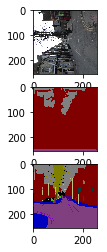

In [54]:
visualize_seg(x_val[100], y_val[100], gt_mode='sparse')


# Data on Disk
In this part, we don't want to load all the data in RAM at once, instead, we want to load batch by batch from disk.

https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

## DataLoader or Dataset?
To do this, we need to change the data set.


You may have thought to change DataLoader class. But TensorDataset is what needs to change. DataLoader only takes care of batching. 

We need to create our own __Dataset__

What we need to do is to create an iterator. To do this, we need to implement 2 functions:
- get_item
- len

Also, unlike the case of using TensorDataset, we can handle the two steps of 1) tensor 2) NCHW inside the new class


In [0]:
from torch.utils.data import Dataset
class CAMVID_Dataset(Dataset):


    def __init__(self, data_path, data_type='train', shape='normal'):

        self.images_dir = str(data_path) + '/' + data_type + '/'
        self.masks_dir = str(data_path) + '/' + data_type + '_labels/'
        assert len(os.listdir(self.images_dir)) == len(os.listdir(self.masks_dir))
        self.data_type = data_type
        #self.enc = enc
        self.shape = shape

    def __len__(self):
        return len(os.listdir(self.images_dir)) - 1 # len is the way the generator knows when to stop ahead, without loading the whole dataset.

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
                
        file = sorted(os.listdir(self.images_dir))[idx]
        
        # Load image
        image = np.array(load_img(str(self.images_dir) + file, target_size=(256,256)))*1./255

        # NCHW
        #image = np.transpose(image, (0,3,1,2)) It's now 3D not 4D, as we load 1 sample at a time
        image = np.transpose(image, (2,0,1))
        # Map to tensor
        image = torch.tensor(image)

        
        
        file = sorted(os.listdir(self.masks_dir))[idx]
        mask = adjust_mask(np.array(load_img(str(self.masks_dir) + file, target_size=(256,256))))
        
        if(self.shape == 'flat'):
          mask = np.reshape(mask.shape[0], mask.shape[1]*mask.shape[2])
          mask = np.expand_dims(mask, axis=-1)        

        '''
        if self.transform:
            sample = self.transform(sample)
        '''
        # Map to tensor
        mask = torch.tensor(mask)

        
        #sample = {'image': image, 'mask': mask}
        # As we saw before, we need to return a tuple
        
        return (image, mask)

In [0]:
train_ds = CAMVID_Dataset(str(data_path), data_type='train')
valid_ds = CAMVID_Dataset(str(data_path), data_type='val')

In [83]:
train_ds


Dataset DatasetFolder
    Number of datapoints: 1402
    Root location: Semantic-Segmentation-Suite/CamVid

Note, the below code takes time, same as load_CAMVID function above.

In [58]:
i = 0
for e in train_ds:
  i +=1
  if(i==1):
    print(e)
print(i)  

Semantic-Segmentation-Suite/CamVid/train/
0
(tensor([[[0.0627, 0.0471, 0.0627,  ..., 0.0627, 0.0549, 0.0667],
         [0.0588, 0.0627, 0.0471,  ..., 0.0784, 0.0627, 0.0667],
         [0.0471, 0.0627, 0.0627,  ..., 0.0471, 0.0588, 0.0627],
         ...,
         [0.0588, 0.0588, 0.0667,  ..., 0.0980, 0.0941, 0.1216],
         [0.0627, 0.0667, 0.0627,  ..., 0.1020, 0.1216, 0.0863],
         [0.0627, 0.0627, 0.0667,  ..., 0.0941, 0.0902, 0.0863]],

        [[0.0627, 0.0471, 0.0627,  ..., 0.0784, 0.0706, 0.0706],
         [0.0588, 0.0627, 0.0471,  ..., 0.0941, 0.0784, 0.0706],
         [0.0471, 0.0627, 0.0627,  ..., 0.0627, 0.0745, 0.0667],
         ...,
         [0.0627, 0.0627, 0.0706,  ..., 0.1373, 0.1333, 0.1647],
         [0.0667, 0.0706, 0.0667,  ..., 0.1333, 0.1647, 0.1333],
         [0.0667, 0.0667, 0.0706,  ..., 0.1333, 0.1373, 0.1255]],

        [[0.0627, 0.0471, 0.0627,  ..., 0.0824, 0.0745, 0.0863],
         [0.0588, 0.0627, 0.0471,  ..., 0.0980, 0.0824, 0.0784],
         [0.0

Now we can proceed with Dataloader as before

In [0]:
train_dl, valid_dl = get_data(train_ds, valid_ds, batch_sz)

And we can train

In [63]:
fit(epochs, model, criterion, opt, train_dl, valid_dl)


Epoch:  0 , Train acc:  0.4252396719796317 , Val acc: 0.5315692862685846 , Val loss:  1.6538402529450151


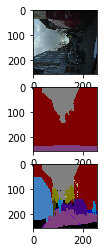

In [138]:
visualize_seg(x_val[10], y_val[10], gt_mode='sparse')

# Using DatasetFolder
https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder

We could do the same as above usign the DataFolder class in torchvision.datasets.The class needs the root folder as above, and the sample loading function.

The `DatasetFolder` is a generic way to load from disk. Later we will see more specific way for image data.

Moreover, it supports any custom function to call for every loaded sample through the `transform` callback. The main usage of `transform` is data augmentation. 

We can think use `target_transform` it with masks loading through `adjust_mask` function to get the GT mask from colored masks. But this is __wrong__, since this interface is specific to the class specified by the subfolder name (see [here](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder)):
```
root/class_x/xxx.ext
root/class_x/xxy.ext
root/class_x/xxz.ext

root/class_y/123.ext
root/class_y/nsdf3.ext
root/class_y/asd932_.ext
```

But in our case, the masks of GT are not the class names. So we need different DatasetFloder for masks and images.


__But what if we have more than one step in the transorm?__

We can wrap it in a function

Or

Then we can use tochvision.transforms, which is like ImageDataGenerator in Keras.

We need two transfroms, one for mask, and another one for images.

Then we will need DatasetFolder for 'train' and 'train_labels', 'val' and 'val_folder'



In [0]:
from torchvision import transforms 
img_transforms = transforms.Compose([lambda img:np.array(img),
                                     lambda img:img*1./255,
                                     lambda img:np.transpose(img, axes=(2,0,1)),
                                     lambda img:torch.tensor(img)])

masks_transforms = transforms.Compose([lambda img:np.array(img),
                                     lambda img:adjust_mask(img),
                                     lambda img:np.transpose(img, axes=(2,0,1)),
                                     lambda img:torch.tensor(img)])

To transform an img, just call the transform function

This could be used above in the CAMVID_Dataset function.

In [133]:
img_transforms(load_img(str(data_path) + '/train_labels/0001TP_006690_L.png'))

tensor([[[0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.

In [134]:
from torchvision.datasets import DatasetFolder

train_img_ds = DatasetFolder(str(data_path)+'/train', extensions='png', loader=lambda img:load_img(img, target_size=(256,256)), transform=img_transforms)
train_masks_ds = DatasetFolder(str(data_path)+'/train_labels', extensions='png', loader=lambda img:load_img(img, target_size=(256,256)), transform=masks_transforms)
val_img_ds = DatasetFolder(str(data_path)+'/val', extensions='png', loader=lambda img:load_img(img, target_size=(256,256)), transform=img_transforms)
val_masks_ds = DatasetFolder(str(data_path)+'/val_labels', extensions='png', loader=lambda img:load_img(img, target_size=(256,256)), transform=masks_transforms)


RuntimeError: ignored

Since the folder structure assumes the images are stored per folder, we need to give the root folder.

Then inside the loader, we load from the specific folder

In [0]:
from torchvision.datasets import DatasetFolder

train_img_ds = DatasetFolder(str(data_path), extensions='png', loader=lambda img:load_img('/train/'+img, target_size=(256,256)), transform=img_transforms)
train_masks_ds = DatasetFolder(str(data_path), extensions='png', loader=lambda img:load_img('/train_labels/'+img, target_size=(256,256)), transform=masks_transforms)
val_img_ds = DatasetFolder(str(data_path), extensions='png', loader=lambda img:load_img('/val'+img, target_size=(256,256)), transform=img_transforms)
val_masks_ds = DatasetFolder(str(data_path), extensions='png', loader=lambda img:load_img('/val_labels'+img, target_size=(256,256)), transform=masks_transforms)


In [136]:
train_img_ds.classes

['test', 'test_labels', 'train', 'train_labels', 'val', 'val_labels']

In [137]:
s = next(enumerate(train_img_ds))

FileNotFoundError: ignored

Still the issue exists. The solution is to put a fake folder under each of train, test,...etc directories.

In keras, we had the option to specifiy the classes=['train'] option in the flow_from_directory function

# Using ImageFolder
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

For image datasets, pytorch (torchvision) provides a special Dataset class `ImageFolder` which provides image loader from folder.

Later we will see how to use the same class to perform online data augmentation.

The `ImageFolder` is corresponding to ImageDataGenerator.flow_from_directory in Keras.

In [0]:
from torchvision.datasets import ImageFolder



We will face the same issue as in DatasetFolder (no way to specify the class subfolder name)

We won't specify any data augmentation for now.

But if we were to, we need to take care of few things:

1- __Fix the seed__ we dont want to perform an operation on the image different from the mask. But in the same time, we have two generators, one for mask and one for images (as they are different files on disk)

2- __How to ensure the label and image files correspond to each others?__ We will have mask and image generators (loaders), each points to a different folder. Moreover, the file names of the img and mask are not the same. When we loaded the data in RAM ourselves, we used sorted to ensure consistency.

In keras, sorted is used as well. See [here](https://stackoverflow.com/questions/42868982/how-do-i-check-the-order-in-which-keras-flow-from-directory-method-processes-fo)


3- When speficifying the directory to flow_from_directory, the function assumes every sub-directory corresponds to a class (see cats vs dogs tutorial). If this is not the case, no files are loaded. However, we are not doing image classification this is not applicable. 
To workaround this, we use the train, val, test folders as if they are class folders, using the parameter `classes`



In [0]:
# Data generator
#https://keras.io/preprocessing/image/
# Data generator
#batch_sz = 4

from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(rescale=1./255)

# So our usage here is as data loader instead of loading everything in RAM, not data augmentation
mask_gen_args = dict()

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['train'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['train_labels'],
    class_mode=None,
    seed=seed,
    color_mode='rgb',
    batch_size=batch_sz,
    target_size=(256,256))

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

      

val_image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['val'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

val_mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['val_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

# combine generators into one which yields image and masks
val_generator = zip(val_image_generator, val_mask_generator)

      

In [0]:

def train_generator_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)        

In [0]:

def val_generator_fn():

    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  

_steps_per_epoch: _
_Remember we dont have constant data size due to augmentation and yield in the generator. If you dont have augmentation and just using flow_from_directory as a data loader, then set this to size/batch_size_

Note that, since we don't use data augmentation, we have fixed data size. In this case steps_per_epoch is just the total_size/batch_size

In [0]:
n_train_samples = len(os.listdir(str(data_path) + '/train/'))
n_train_samples

In [0]:

model = unet(n_classes)

In [0]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=n_train_samples,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])

## Let's test the model on sample images

In [0]:
visualize_seg(next(val_image_generator)[0], next(val_mask_generator)[0], gt_mode='sparse')

## Data augmentation

When doing data augmentation we have to take of few things:

1- No transform to change the pixel values of the masks. Otherwise, the colors ranges will not be found in the dict.

2- Any geometric transform must be applied equally on the mask and the img

3- Fix the seed between mask and img generators, so that the same operation is applied to both.



In [0]:
# Data generator
#batch_sz = 4
#https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    rescale=1./255)

mask_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['train'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['train_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

def train_generator_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  
        
val_image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['val'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

val_mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['val_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

# combine generators into one which yields image and masks
val_generator = zip(val_image_generator, val_mask_generator)        
        
def val_generator_fn():

    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)         




Let's take a look on some augmented images and masks

In [0]:
img = load_img(str(data_path) + '/train/0001TP_006690.png', target_size=(256,256))
img

In [0]:
mask = load_img(str(data_path) + '/train_labels/0001TP_006690_L.png', target_size=(256,256))
mask

In [0]:
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
from keras.preprocessing.image import array_to_img, img_to_array
i = 0
img = img_to_array(img)
mask = img_to_array(mask)
for aug_img, aug_mask in zip(image_datagen.flow(np.expand_dims(img, 0), batch_size=1), mask_datagen.flow(np.expand_dims(mask, 0), batch_size=1)):
    plt.figure(i)
    plt.subplot(221)
    imgplot = plt.imshow(array_to_img(aug_img[0]))
    plt.subplot(222)
    imgplot = plt.imshow(array_to_img(aug_mask[0]))
    i += 1
    if i > 10:
        break

plt.show()

In [0]:
model = unet(n_classes)


Since we are doing data augmentation, we don't have a static data set, so we use the steps_per_epoch to control how many augmented samples per epoch we want. Let's have 1000.

In [0]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])

# Let's try some samples

In [0]:
img = next(val_image_generator)[0]
gt_img = next(val_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')


# Data augmentation on data in RAM

In the above we link data augmentation to data loading.

In fact they are both independent.

Data augmentation is defined in the `ImageDataGenerator` class, or any other generator using yield

The generator can be used with files on disk (data loader), if we use flow_from_directory function.

It can also be used with data in RAM, using just the flow function

Since we are calling adjust_mask inside the generator, so we need to load the raw mask, and leave the generator to do its job.

We need to modify load_CAMVID NOT to load OHE masks, but raw colors:

In [0]:
def load_raw_CAMVID(data_type='train', enc='ohe', shape='normal'):
  img_path = str(data_path) + '/' + data_type + '/'
  labels_path = str(data_path) + '/' + data_type + '_labels/'
  # without adding target_size=(256,256) in load_img we get Out of mem: 421x960x720x32x4bytes is around 34GB!
  x = np.array([np.array(load_img(str(img_path) + file, target_size=(256,256)))*1./255 for file in sorted(os.listdir(img_path))])
  if(enc=='ohe'):
    
    y = np.array([np.array(load_img(str(labels_path) + file, target_size=(256,256))) for file in sorted(os.listdir(labels_path))])
  elif(enc=='sparse_cat'):
    y = np.array([np.array(load_img(str(labels_path) + file, target_size=(256,256))) for file in sorted(os.listdir(labels_path))])
  if(shape == 'flat'):
    y = np.reshape(y.shape[0], y.shape[1]*y.shape[2])
    y = np.expand_dims(y, axis=-1)
  return x, y

In [0]:
import time
start = time.time()
x_train, y_train = load_raw_CAMVID(data_type='train')
#x_test, y_test = load_raw_CAMVID(data_type='test')# Don't load test for RAM consumption
x_val, y_val = load_raw_CAMVID(data_type='val')
end = time.time()
print('Time elapsed: ', end-start)

print(x_train.shape)
print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

__Since we scaled while loading the data, we don't need to scale in the generator__

In [0]:
# Data generator
#batch_sz = 4
#https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    #rescale=1./255)# Data is already scaled when loaded

mask_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    #preprocessing_function=adjust_mask)# This is not possible since the preprocessing_function can only return the same shape as image

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow(
    x_train,
    seed=seed,
    batch_size=batch_sz)

mask_generator = mask_datagen.flow( 
    y_train,
    seed=seed,
    batch_size=batch_sz)

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

def train_generator_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  
        
val_image_generator = image_datagen.flow(
    x_val,
    seed=seed,
    batch_size=batch_sz)

val_mask_generator = mask_datagen.flow(
    y_val,
    seed=seed,
    batch_size=batch_sz)

# combine generators into one which yields image and masks
val_generator = zip(val_image_generator, val_mask_generator)        
        
def val_generator_fn():

    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)         


In [0]:
model = unet(n_classes)

In [0]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])

# Try some samples

In [0]:
img = next(val_image_generator)[0]
gt_img = next(val_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')